# <font color ='green' >1) Import Dataset and Libraries

In [47]:
import pandas as pd
from collections import Counter as c
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [97]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

# from lazypredict.Supervised import LazyClassifier

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor # why?
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


from xgboost import XGBRegressor , XGBRFRegressor
import lightgbm as lgb
from lightgbm import  LGBMRegressor
from catboost import CatBoostRegressor



#preprocessing
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder

# GridSearchCV to find optimal min_samples_leaf, Model Selection
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, StratifiedKFold, cross_val_score

from sklearn.pipeline import Pipeline


In [4]:
df = pd.read_csv("USA_Housing.csv")

In [5]:
2

2

In [6]:
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [7]:
df.tail()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
4995                          3.46     22837.361035  1.060194e+06   
4996                          4.02     25616.115489  1.482618e+06   
4997                          2.13     33266.145490  1.030730e+06   
4998                          5.44     42625.620156  1.198657e+06   
4999                          4.07     46501.283803  1.298950e+06   

                                                Address  
4995                   USNS Williams\nFPO AP 30153-7653  
4996              PSC 9258, Box 8489\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\nJoshualand, VA 01...  
4998                          USS Wallace\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\nEast Holly, NV 2...

In [11]:
df.columns.to_list()

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
3

3

In [9]:
df.shape

(5000, 7)

In [10]:
df.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [12]:
4

4

In [13]:
5

5

In [19]:
c(df.Address) 

Counter({'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101': 1,
         '188 Johnson Views Suite 079\nLake Kathleen, CA 48958': 1,
         '9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489': 1,
         'USS Barnett\nFPO AP 44820': 1,
         'USNS Raymond\nFPO AE 09386': 1,
         '06039 Jennifer Islands Apt. 443\nTracyport, KS 16077': 1,
         '4759 Daniel Shoals Suite 442\nNguyenburgh, CO 20247': 1,
         '972 Joyce Viaduct\nLake William, TN 17778-6483': 1,
         'USS Gilbert\nFPO AA 20957': 1,
         'Unit 9446 Box 0958\nDPO AE 97025': 1,
         '6368 John Motorway Suite 700\nJanetbury, NM 26854': 1,
         '911 Castillo Park Apt. 717\nDavisborough, PW 78603': 1,
         '209 Natasha Stream Suite 961\nHuffmanland, NE 52457': 1,
         '829 Welch Track Apt. 992\nNorth John, AR 26532-5136': 1,
         'PSC 5330, Box 4420\nAPO AP 08302': 1,
         '2278 Shannon View\nNorth Carriemouth, NM 84617': 1,
         '064 Hayley Unions\nNicholsborough, HI 44161

In [20]:
df.Address

0       208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1       188 Johnson Views Suite 079\nLake Kathleen, CA...
2       9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                               USS Barnett\nFPO AP 44820
4                              USNS Raymond\nFPO AE 09386
                              ...                        
4995                     USNS Williams\nFPO AP 30153-7653
4996                PSC 9258, Box 8489\nAPO AA 42991-3352
4997    4215 Tracy Garden Suite 076\nJoshualand, VA 01...
4998                            USS Wallace\nFPO AE 73316
4999    37778 George Ridges Apt. 509\nEast Holly, NV 2...
Name: Address, Length: 5000, dtype: object

In [24]:
df1 = df.drop(columns="Address")
df1.shape , df.shape

((5000, 6), (5000, 7))

In [25]:
df1.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09     23086.800503  1.059034e+06  
1                          3.09     40173.072174  1.505891e+06  
2                          5.13     36882.159400  1.058988e+06  
3                          3.26     34310.242831  1.260617e+06  
4                          4.23     26354.109472  6.309435e+05

In [14]:
6

6

In [26]:
df1.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [17]:
7

7

<AxesSubplot:>

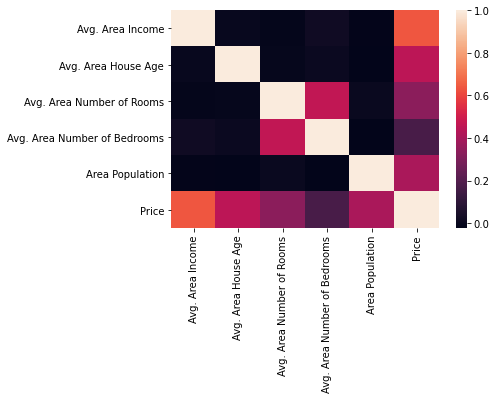

In [29]:
sns.heatmap(df.corr())

In [50]:
def corr_2_more_visualize(dataset):
    corr = dataset.corr()
    
    f, ax = plt.subplots(figsize=(20, 9))
    sns.heatmap(corr.apply(lambda x : np.round(x,2)), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,cmap='RdYlGn', annot_kws={"size": 15})
    ax.tick_params(labelsize=20)
    plt.show()



def visualize_numberical_values(dataset): #takes time
    plt.figure(figsize=(18,34))
    sns.pairplot(dataset)
    plt.show()
    
def visualize_pairplot_target(dataset, numberical_col_list , target_val):
    plt.figure(figsize=(18,34))
    sns.pairplot(data = dataset[numberical_col_list],hue = target_val)
    
    #     sns.pairplot(data = telecom_df[['arpu_6','arpu_7','arpu_8','churn_flag']],hue = 'churn_flag') 
    #check for classification
    plt.show()
    
def corr_metrix(dataset):
    corr = dataset.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))# Set up the matplotlib figure

    cmap = sns.diverging_palette(220, 10, as_cmap='RdYlGn')    # Generate a custom diverging colormap

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
    ax.tick_params(labelsize=20)

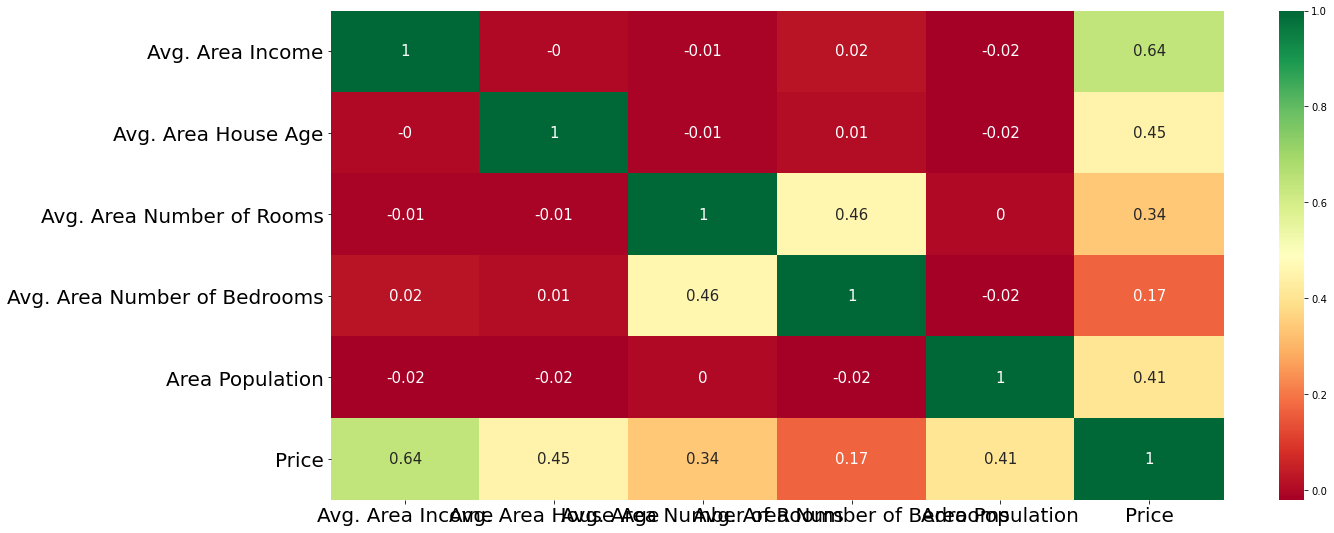

In [49]:
corr_2_more_visualize(df1)

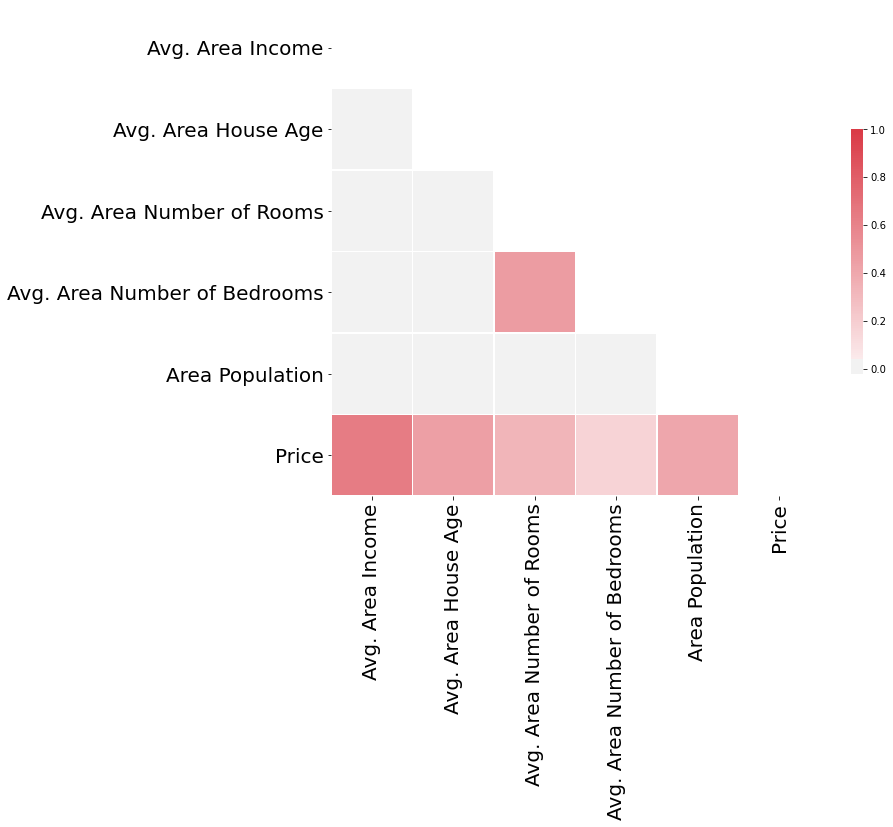

In [51]:
corr_metrix(df1)

<Figure size 1296x2448 with 0 Axes>

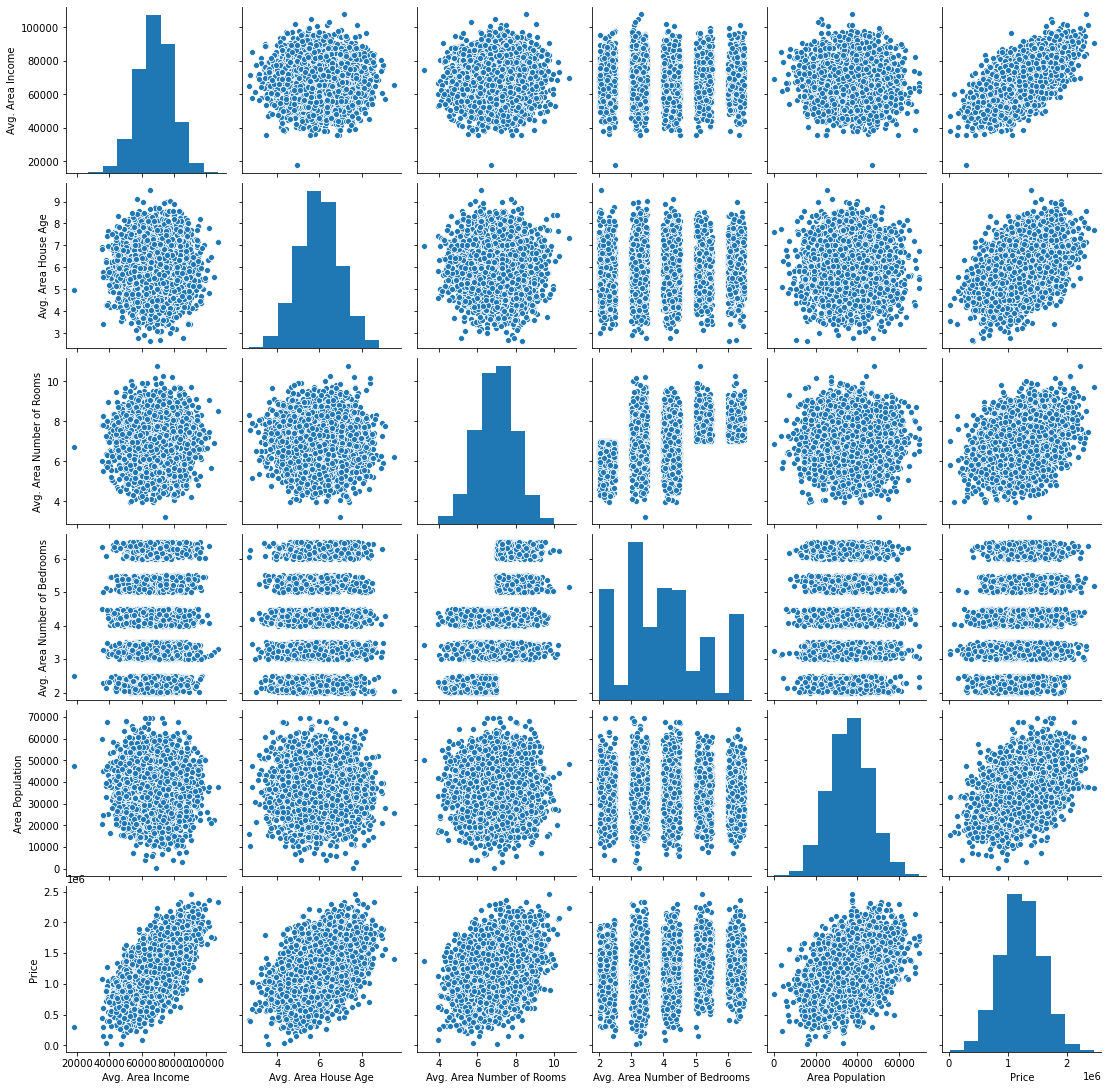

In [33]:
visualize_numberical_values(df1)

In [34]:
df1.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

/home/rakesh/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


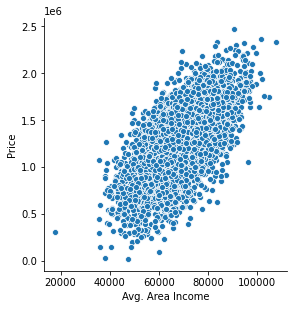

In [44]:
def pair_plot(dataset, numberical_col_list , target_val):
    sns.pairplot(dataset, x_vars= numberical_col_list, y_vars = target_val, size=4, kind='scatter')
    plt.show()
    
# numberical_col_list = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms']
numberical_col_list = ['Avg. Area Income']


target_val = "Price"
pair_plot(df1, numberical_col_list , target_val)

In [52]:
8

8

In [53]:
df1.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [56]:
X = df1.iloc[:,:-1]
print(df1.shape)
print(X.shape)
X.head()

(5000, 6)
(5000, 5)


Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09     23086.800503  
1                          3.09     40173.072174  
2                          5.13     36882.159400  
3                          3.26     34310.242831  
4                          4.23     26354.109472

In [57]:
Y = df1.iloc[:,-1]
Y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [62]:
9

9

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.7, random_state=10 )

In [65]:
10

10

In [71]:
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [72]:
mean_absolute_error(Y_test, y_pred)

82199.03534605725

In [81]:
11

11

In [86]:


print("Accuracy  :  ", round(r2_score(Y_test, y_pred)))

Accuracy  :   1 2


In [80]:
12

12

In [73]:
def get_accuracy(y_actual, y_pred, data_type = "Train"):
    print("Model Evaluation Dataset Type is  : ", data_type)
    print("\n")
    
    print("Accuracy  :  ", r2_score(y_actual, y_pred))
    print("MAE       :  ", mean_absolute_error(y_actual, y_pred))
    print("MSLE      :  ", mean_squared_log_error(y_actual, y_pred))
    print("MSE       :  ", mean_squared_error(y_actual, y_pred))
    print("RMSE      :  ", np.sqrt(mean_squared_error(y_actual, y_pred)))

In [79]:
get_accuracy(Y_test, y_pred, data_type = "Test")

Model Evaluation Dataset Type is  :  Test


Accuracy  :   0.9163645194229688
MAE       :   82199.03534605725
MSLE      :   0.01092073426863798
MSE       :   10447802903.398563
RMSE      :   102214.4945856436


# Extra

In [98]:
rows=[]

def mean_absolute_percentage_error(y_true, y_pred) :
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    return np.mean(np.abs( (y_true - y_pred) / 100) ) * 100


def root_mean_sequare_error(y_true, y_pred) : 
    mse = mean_squared_error(y_true,  y_pred)  
    return np.sqrt(mse)

def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.30 , random_state = i)
            
            model.fit(x_train,y_train)
            
            y_pred_train = model.predict(x_train)
            y_pred = model.predict(x_test)
            
            train_acc = r2_score(y_train, y_pred_train)
            train_acc = round(train_acc, 2) * 100
            
            test_acc = r2_score(y_test, y_pred)
            test_acc = round(test_acc, 2) * 100
            
            mape = mean_absolute_percentage_error(y_test, y_pred)
            mape = round(mape, 2)
            
            mae = mean_absolute_error(y_test, y_pred)   
            mae = round(mae, 2)
            
            mse = mean_squared_error(y_test, y_pred)
            mse = round(mse, 2)
            
            rmse = root_mean_sequare_error(y_test, y_pred)
            rmse = round(rmse, 2)

            row = [names[j],   i,   train_acc, test_acc,  mae,    mse]
    
            rows.append(row)
            
    models_df = pd.DataFrame(rows) 
    
    models_df.columns = columns_name
    print(models_df)
    
# names_regression = [ "Lasso", "Ridge"]
# algorithms = [ Lasso(), Ridge()]

names_regression = [ "Linear", "RF", "XGB", "DT", "LGB"]
algorithms = [ LinearRegression(), RandomForestRegressor(), XGBRegressor(), DecisionTreeRegressor(), LGBMRegressor()]


columns_name = ["Model",    "Random_state",   'Train_acc',     "Test_acc",   "MAE",   "MSE"]

random_state_list_up_to_10 = [0,1,2,3]


addRandomStateForAlgorithm(X,Y,names_regression,algorithms,columns_name,random_state_list_up_to_10)


     Model  Random_state  Train_acc  Test_acc        MAE           MSE
0   Linear             0       92.0      92.0   81563.15  1.033734e+10
1   Linear             1       92.0      92.0   82745.91  1.056745e+10
2   Linear             2       92.0      92.0   79912.71  9.831075e+09
3   Linear             3       92.0      92.0   81088.00  1.027703e+10
4       RF             0       98.0      89.0   96128.04  1.454015e+10
5       RF             1       98.0      88.0   95806.17  1.460370e+10
6       RF             2       98.0      88.0   95249.88  1.419630e+10
7       RF             3       98.0      88.0   95012.31  1.480055e+10
8      XGB             0       98.0      88.0   99519.41  1.551406e+10
9      XGB             1       98.0      88.0   97657.32  1.511377e+10
10     XGB             2       98.0      88.0   97981.73  1.483673e+10
11     XGB             3       98.0      87.0  100668.96  1.595368e+10
12      DT             0      100.0      76.0  137561.15  3.071508e+10
13    

In [103]:
from pandas_profiling import ProfileReport

In [101]:
#!pip install pandas_profiling

In [106]:
ProfileReport(df1)